# 技術者のための線形代数学 1章 デモ
1. 1次変換
    + 行列の要素を色々変更するとどうなるか

2. 固有値関連の内容

3. 最小二乗法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# 1次変換
+ 教科書から1次変換は
$$
\left[\begin{array}{c}
    x' \\
    y' \\
\end{array}\right] = 
A
\left[\begin{array}{c}
    x \\
    y \\
\end{array}\right]
$$
ここでは、画像の拡大、せん断、回転を見てみる

In [2]:
X = np.array([[0,0,0,0,0,0,0],[0,1,1,1,1,1,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[0,0,0,0,0,0,0]])
(pos_x, pos_y) = np.where(X == 1)

## 対象となる画像:

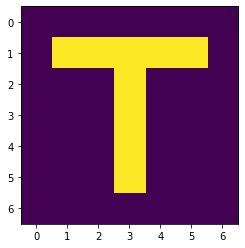

In [3]:
plt.imshow(X)
plt.show()

## 画像の拡大
+ 拡大行列$P(\alpha, \beta)$は
$$
P(\alpha, \beta) = \left[\begin{array}{cc}
    \alpha & 0 \\
    0 & \beta \\
\end{array}\right]
$$
特に$(a,b)$周りで拡大したとき、変換後の位置$(x', y')$は
$$
\left[\begin{array}{c}
    x' \\
    y' \\
\end{array}\right] = 
\left[\begin{array}{cc}
    \alpha & 0 \\
    0 & \beta \\
\end{array}\right]
\left[\begin{array}{c}
    x - a \\
    y - b \\
\end{array}\right]
+
\left[\begin{array}{c}
    a \\
    b \\
\end{array}\right]
$$
+ ** 画像の行き先をドット上にしてするため四捨五入しているので割と粗いです **

In [4]:
def im_extend(alpha, beta, offset_x, offset_y):
    """
    画像を拡大する関数
    """
    P = np.array([[alpha, 0], [0, beta]])
    pos_dash = np.zeros((len(pos_x), 2))
    X_dash = np.zeros(X.shape)
    for i, (i_pos_x, i_pos_y) in enumerate(zip(pos_x, pos_y)):
        pos_dash[i,:] = np.round(P @ np.array([i_pos_x - offset_x, i_pos_y - offset_y])) + np.array([offset_x, offset_y])
        
    for i in range(len(pos_x)):
        X_dash[int(pos_dash[i,0]), int(pos_dash[i,1])] = X[pos_x[i], pos_y[i]]
    print("元の画像:")
    plt.imshow(X)
    plt.show()
    
    print("1次変換の行列:")
    print(P)
    print("1次変換適用後の画像:")
    plt.imshow(X_dash)
    plt.show()

In [5]:
interact(im_extend, alpha = (0, 2, 0.1), beta=(0, 2, 0.1), offset_x = (0, 7, 1), offset_y=(0, 7, 1))

interactive(children=(FloatSlider(value=1.0, description='alpha', max=2.0), FloatSlider(value=1.0, description…

<function __main__.im_extend(alpha, beta, offset_x, offset_y)>

## 画像の拡大
+ 拡大行列$P(\alpha, \beta)$は
$$
Q(\gamma) = \left[\begin{array}{cc}
    1 & \gamma \\
    0 & 1 \\
\end{array}\right]
$$
特に$(a,b)$周りで拡大したとき、変換後の位置$(x', y')$は
$$
\left[\begin{array}{c}
    x' \\
    y' \\
\end{array}\right] = 
\left[\begin{array}{cc}
    1 & \gamma \\
    0 & 1 \\
\end{array}\right]
\left[\begin{array}{c}
    x - a \\
    y - b \\
\end{array}\right]
+
\left[\begin{array}{c}
    a \\
    b \\
\end{array}\right]
$$
+ ** 画像の行き先をドット上にしてするため四捨五入しているので割と粗いです **

In [6]:
def im_shear(gamma, offset_x, offset_y):
    """
    画像をせん断する関数
    """
    Q = np.array([[1, gamma], [0, 1]])
    pos_dash = np.zeros((len(pos_x), 2))
    X_dash = np.zeros(X.shape)
    for i, (i_pos_x, i_pos_y) in enumerate(zip(pos_x, pos_y)):
        pos_dash[i,:] = np.round(Q @ np.array([i_pos_x - offset_x, i_pos_y - offset_y])) + np.array([offset_x, offset_y])
        
    for i in range(len(pos_x)):
        X_dash[int(pos_dash[i,0]), int(pos_dash[i,1])] = X[pos_x[i], pos_y[i]]
    print("元の画像:")
    plt.imshow(X)
    plt.show()
    
    print("1次変換の行列:")
    print(Q)
    print("1次変換適用後の画像:")
    plt.imshow(X_dash)
    plt.show()

In [7]:
interact(im_shear, gamma=(-2.7, 2.7, 0.1), offset_x = (0, 7, 1), offset_y=(0, 7, 1))

interactive(children=(FloatSlider(value=0.0, description='gamma', max=2.7, min=-2.7), IntSlider(value=3, descr…

<function __main__.im_shear(gamma, offset_x, offset_y)>

## 画像を回転させる
+ 回転行列$R(\theta)$は
$$
R(\theta) = \left[\begin{array}{cc}
    \cos(\theta) & -\sin(\theta) \\
    \sin(\theta) & \cos(\theta) \\
\end{array}\right]
$$
特に$(a,b)$周りで回転したとき、回転先の位置$(x', y')$は
$$
\left[\begin{array}{c}
    x' \\
    y' \\
\end{array}\right] = 
\left[\begin{array}{cc}
    \cos(\theta) & -\sin(\theta) \\
    \sin(\theta) & \cos(\theta) \\
\end{array}\right]
\left[\begin{array}{c}
    x - a \\
    y - b \\
\end{array}\right]
+
\left[\begin{array}{c}
    a \\
    b \\
\end{array}\right]
$$
+ ** 画像の行き先をドット上にしてするため四捨五入しているので割と粗いです **

In [8]:
def im_rotate(theta, offset_x, offset_y):
    R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    pos_dash = np.zeros((len(pos_x), 2))
    X_dash = np.zeros(X.shape)
    for i, (i_pos_x, i_pos_y) in enumerate(zip(pos_x, pos_y)):
        pos_dash[i,:] = np.round(R @ np.array([i_pos_x - offset_x, i_pos_y - offset_y])) + np.array([offset_x, offset_y])
        
    for i in range(len(pos_x)):
        X_dash[int(pos_dash[i,0]), int(pos_dash[i,1])] = X[pos_x[i], pos_y[i]]
    print("元の画像:")
    plt.imshow(X)
    plt.show()

    print("1次変換の行列:")
    print(R)
    print("1次変換適用後の画像:")
    plt.imshow(X_dash)
    plt.show()

In [9]:
interact(im_rotate, theta=(-np.pi, np.pi+0.1, 0.1*np.pi), offset_x = (0, 7, 1), offset_y=(0, 7, 1))

interactive(children=(FloatSlider(value=0.0, description='theta', max=3.241592653589793, min=-3.14159265358979…

<function __main__.im_rotate(theta, offset_x, offset_y)>

# 固有値関連の内容
+ データの次元を圧縮する

In [119]:
n = 200
data_seed = 20191012
np.random.seed(data_seed)

In [120]:
(a,b) = (-3, 5)

## $x \sim U(-10, 10)$, $y=ax+b + noise$に従ってデータを発生させる

In [121]:
domain_X = (-5, 5)
X = np.random.uniform(low = domain_X[0], high = domain_X[1], size = n)
Y = a*X + b + np.random.normal(scale = 4, size = n)
original_data = np.array([X,Y]).T

In [122]:
test_X = np.linspace(start = domain_X[0], stop = domain_X[1], num = 100)
test_Y = a*test_X + b

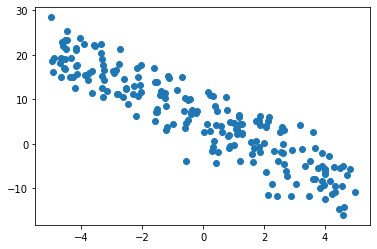

In [123]:
plt.scatter(X,Y)
plt.show()

## 情報は$ax + b$に集約されているので、この(x,y)を線分上に射影したい

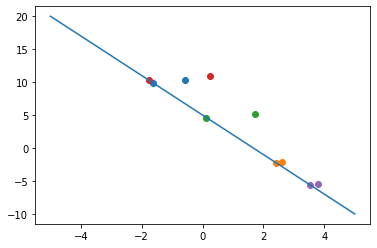

In [124]:
chose_ind = np.random.permutation(n)
chose_num = 5
plt.plot(test_X, test_Y)
for i in range(chose_num):
    d = np.array([1, a])
    p0 = np.array([0, b])
    p = (X[chose_ind[i]], Y[chose_ind[i]])
    length = (-d@(p0-p))/(d@d)
    OS = p0 + length*d
    data_X = np.array([p[0], OS[0]])
    data_Y = np.array([p[1], OS[1]])
    plt.scatter(data_X, data_Y)
plt.show()

## 求め方
+ 以下の関数$L(w)$の最大化を行えばよい
$$
L(w) = \sum_{i=1}^n (x_i^T w)^2
$$
感覚的には、x_iのばらつきが大きい方向を見つけて、そのばらつきを除去するようなことをしている。  
$w^T w = 1$の制約の下でこれを解くと、$X^T X$に対する教科書の固有値問題を解くのと同じになる:

In [125]:
norm_mean = original_data.mean(axis = 0)
norm_data = original_data - norm_mean

In [126]:
cov_mat = norm_data.T @ norm_data

In [127]:
def is_pos_def(A:np.ndarray):
    if not np.allclose(A, A.T):
        return False
    try:
        np.linalg.cholesky(A)
    except np.linalg.LinAlgError:
        return False
    return True

In [128]:
### 正定値性のチェック
if is_pos_def(cov_mat):
    [eig_val, eig_vec] = np.linalg.eigh(cov_mat)
    compressed_proj = eig_vec[:,1]

In [129]:
proj_data = (norm_data @ compressed_proj).reshape(n,1) @ compressed_proj.reshape(1,2) + norm_mean

In [130]:
# focus_ind = 9
# plt.plot(test_X, test_Y)
# plt.scatter(original_data[focus_ind,0], original_data[focus_ind,1])
# plt.scatter(proj_data[focus_ind,0], proj_data[focus_ind,1])
# plt.show()

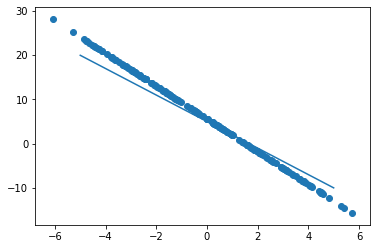

In [131]:
plt.plot(test_X, test_Y)
# plt.scatter(original_data[:,0], original_data[:,1])
plt.scatter(proj_data[:,0], proj_data[:,1])
plt.show()

# 最小二乗法

## 普通の場合
+ $L(w) = \sum_{i=1}^n (y_i - x_i^Tw)^T (y_i - x_i^Tw)$, where $x_i, w \in \mathbb{R}^2$について  
+ $L(w)$を最小にする$w$($(=\hat{w}$とする)を見つける問題を考えたい
    + 点が与えられて、点をいい感じに通るような線が知りたい
        + 応用: 点: (年齢, 平均寿命)でデータがない部分の平均寿命が知りたい etc.

In [167]:
n = 20
data_seed = 20191012
np.random.seed(data_seed)

In [168]:
domain_X = (-5, 5)
train_X = np.ones((n,2))
train_X[:,1] = np.random.uniform(low = domain_X[0], high = domain_X[1], size = n)
true_w = np.array([-2, 3])
train_Y = train_X @ true_w + np.random.normal(scale = 1, size = n)

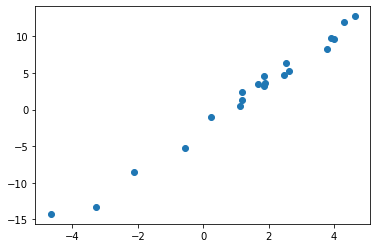

In [169]:
plt.scatter(train_X[:,1], train_Y)
plt.show()

## 求め方
+ $L(w)$は行列で書くとシンプルに書ける(白板で示します):
    + $L(w) = (y - Xw)^T (y - Xw)$
+ $L(w)$は2次関数の一般化みたいなものなので、2次関数の最小問題のようにすれば解ける:
    + $L(w) = (w - \hat{w})^T A (w - \hat{w})$みたいにかけるはずで、$\hat{w},A$を平方完成(数Iを参照)の一般化をすればよい

+ 答え
$\hat{w} = (X^T X)^{-1}X y$

In [170]:
est_mle_w = np.linalg.solve(train_X.T @ train_X, train_X.T @ train_Y)

In [171]:
test_X_range = np.linspace(start = -5, stop = 5, num = 20)
test_X = np.ones((len(test_X_range),2))
test_X[:,1] = test_X_range
test_true_Y = test_X @ true_w
test_est_mle_Y = test_X @ est_mle_w

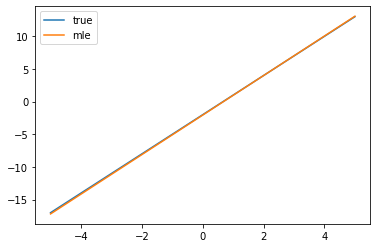

In [172]:
plt.plot(test_X[:,1], test_true_Y, label ="true")
plt.plot(test_X[:,1], test_est_mle_Y, label = "mle")
plt.legend()
plt.show()

## 過学習の場合
+ $x_i$の値に引っ張られたり、$(X^T X)^{-1}$は固有値に0を含むとうまく計算できない
    + $det(X^T X) = \lambda_1 * \lambda_2$で、行列式が0になるため
+ $L(w) = \sum_{i=1}^n (y_i - x_i^Tw)^T (y_i - x_i^Tw)$, where $x_i, w \in \mathbb{R}^2 + \beta w^T w$を考える($\beta > 0$)と固有値0問題は実は解決する:
    + $(X^T X)^{-1} \rightarrow (X^T X + \beta I)^{-1}$
+ $A + B$の固有値は$\lambda_A + \lambda_B$で($\lambda_A$は$A$の固有値, $\lambda_B$は$B$の固有値), $\beta I$の固有値は$\beta$, $X^T X$の固有値は実は$\geq 0$ (証明は今後出てくるかもしれない)なので、$X^T X + \beta I$の固有値は$>0$


In [185]:
n = 10
data_seed = 20191012
np.random.seed(data_seed)

In [186]:
domain_X = (-5, 5)
train_X = np.ones((n,2))
train_X[:,1] = np.random.uniform(low = domain_X[0], high = domain_X[1], size = n)
true_w = np.array([2, 3])
train_Y = train_X @ true_w + np.random.normal(scale = 4, size = n)

In [187]:
np.linalg.eigh(train_X.T @ train_X)

(array([  7.33135934, 119.23427063]), array([[-0.98800414,  0.1544274 ],
        [ 0.1544274 ,  0.98800414]]))

In [188]:
beta = 2

In [189]:
# train_Y[0] = 10
# train_Y[2] = 15

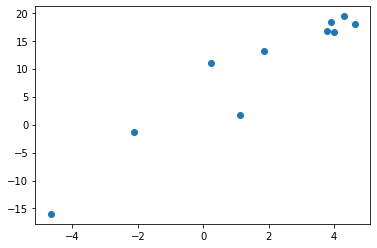

In [190]:
plt.scatter(train_X[:,1], train_Y)
plt.show()

In [191]:
est_ridge_w = np.linalg.solve(train_X.T @ train_X + beta * np.eye(2), train_X.T @ train_Y)
est_mle_w = np.linalg.solve(train_X.T @ train_X, train_X.T @ train_Y)

In [192]:
test_X_range = np.linspace(start = -5, stop = 5, num = 20)
test_X = np.ones((len(test_X_range),2))
test_X[:,1] = test_X_range
test_true_Y = test_X @ true_w
test_est_mle_Y = test_X @ est_mle_w
test_est_ridge_Y = test_X @ est_ridge_w

In [193]:
est_mle_w, est_ridge_w

(array([3.74526836, 3.52030678]), array([3.06646967, 3.55867294]))

In [194]:
# np.linalg.solve(train_X.T @ train_X + beta * np.eye(2), train_X.T)

In [195]:
# np.linalg.solve(train_X.T @ train_X, train_X.T)

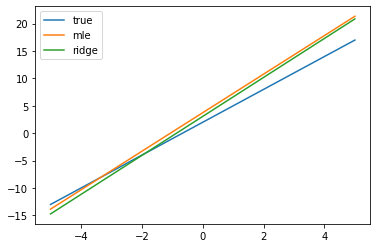

In [196]:
plt.plot(test_X[:,1], test_true_Y, label = "true")
plt.plot(test_X[:,1], test_est_mle_Y, label ="mle")
plt.plot(test_X[:,1], test_est_ridge_Y, label = "ridge")
plt.legend()
plt.show()

+ mleが引っ張られる理由はラグランジュの未定乗数法から出るが、線形代数学の範囲外なので割愛
+ 